In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm

In [2]:
class advector(object):
    '''
    A class for advecting particles over a deterministic flowfield
    '''
    
    def __init__(self, x0, dt):
        self.x = [x0]
        self.dt = dt
        self.t = [0.0]
        
        
    def flowfield(self, x):
        '''
        returns the flo velocity vector at given locations x
        x is a 2d array, (N,D), of N points in D dimensions
        '''
        # a Taylor green vortex in 2D:
        a, b = .5*np.pi, .5*np.pi
        u = np.cos(a*x[:,0]) * np.sin(b*x[:,1])
        v = - np.sin(a*x[:,0]) * np.cos(b*x[:,1])
        U = np.append([u],[v], axis=0).transpose()
        return U
    
    def step(self):
        U0 = self.flowfield(self.x[-1])
        x1 = U0*self.dt + self.x[-1]
        U1 = self.flowfield( x1 )
        
        U = (U1 + U0)/2.0
        x_ip1 = U*self.dt + self.x[-1]
        
        self.x.append(x_ip1)
        self.t.append(self.t[-1] + self.dt)
        

In [9]:
x_, y_ = np.mgrid[-1.:1.:100j, -1.:1.:100j]
x0 = np.array([x_.ravel(), y_.ravel()]).transpose()
dt = 0.05


adv = advector(x0, dt)

for i in range(500):
    adv.step()

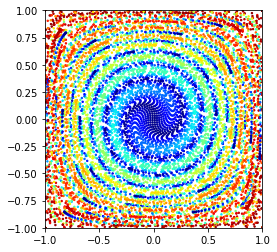

In [11]:
cmap = matplotlib.cm.jet

fig, ax = plt.subplots()


c = np.abs(adv.x[0][:,1])
color = cmap(c)

for step in range(0,len(adv.x),20):
    
    ax.clear()
    ax.scatter(adv.x[step][:,0], adv.x[step][:,1], c = color, s=2)
    ax.set_xlim(-1.0,1.0)
    ax.set_ylim(-1.0,1.0)
    ax.set_aspect('equal')
    fig.savefig('./ims/%02d.jpg'%step)
    